In [1]:
pip install lsq-ellipse

Note: you may need to restart the kernel to use updated packages.


## LSFE algo

center: 1.248, 1.244
width: 0.991
height: 0.640
phi: 0.617


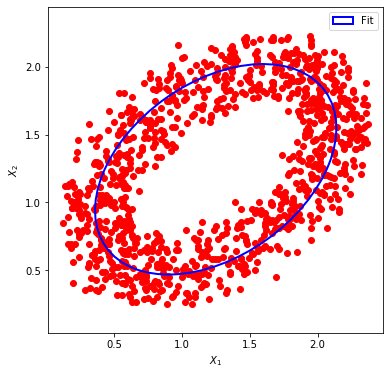

In [14]:
import numpy as np
from ellipse import LsqEllipse
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse


def make_test_ellipse(center=[1, 1], width=1, height=.6, phi=3.14/5):
    """Generate Elliptical data with noise
    Parameters
    ----------
    center: list:float
        (<x_location>, <y_location>)
    width: float
        semimajor axis. Horizontal dimension of the ellipse (**)
    height: float
        semiminor axis. Vertical dimension of the ellipse (**)
    phi: float:radians
        tilt of the ellipse, the angle the semimajor axis
        makes with the x-axis
    Returns
    -------
    data:  list:list:float
        list of two lists containing the x and y data of the ellipse.
        of the form [[x1, x2, ..., xi],[y1, y2, ..., yi]]
    """
    t = np.linspace(0, 2*np.pi, 1000)
    x_noise, y_noise = np.random.rand(2, len(t))

    ellipse_x = center[0] + width*np.cos(t)*np.cos(phi)-height*np.sin(t)*np.sin(phi) + x_noise/2.  # noqa: E501
    ellipse_y = center[1] + width*np.cos(t)*np.sin(phi)+height*np.sin(t)*np.cos(phi) + y_noise/2.  # noqa: E501

    return [ellipse_x, ellipse_y]


if __name__ == '__main__':
    X1, X2 = make_test_ellipse()

    X = np.array(list(zip(X1, X2)))
    reg = LsqEllipse().fit(X)
    center, width, height, phi = reg.as_parameters()

    print(f'center: {center[0]:.3f}, {center[1]:.3f}')
    print(f'width: {width:.3f}')
    print(f'height: {height:.3f}')
    print(f'phi: {phi:.3f}')

    fig = plt.figure(figsize=(6, 6))
    ax = plt.subplot()
    ax.axis('equal')
    ax.plot(X1, X2, 'ro', zorder=1)
    ellipse = Ellipse(
        xy=center, width=2*width, height=2*height, angle=np.rad2deg(phi),
        edgecolor='b', fc='None', lw=2, label='Fit', zorder=2
    )
    ax.add_patch(ellipse)

    plt.xlabel('$X_1$')
    plt.ylabel('$X_2$')

    plt.legend()
    plt.show()